In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras


In [ ]:
data = pd.read_csv('/content/sample_data/SDDP Dataset - Sheet1.csv')
df=data

In [ ]:
columns=data.columns
print(columns)

Index(['Timestamp', 'Origin', 'Destination', 'Via', 'Traffic_Speed',
       'Traffic_Volume', 'Traffic_Jam_Label', 'Weather_Condition',
       'Weather_Attribute', 'Event_Type'],
      dtype='object')


In [ ]:
df.head(10)

,Timestamp,Origin,Destination,Via,Traffic_Speed,Traffic_Volume,Traffic_Jam_Label,Weather_Condition,Weather_Attribute,Event_Type
0,2022-10-01 08:00,Chennai,Tiruvallur,Chennai - Tiruthani - Renigunta Road (Old NH205),60,300,Low,Clear,Sunny,No Event
1,2022-10-01 12:00,Chennai,Tiruvallur,Chennai - Tiruthani - Renigunta Road (Old NH205),65,320,Low,Clear,Sunny,No Event
2,2022-10-01 16:00,Chennai,Tiruvallur,Chennai - Tiruthani - Renigunta Road (Old NH205),55,280,Medium,Partly Cloudy,Windy,No Event
3,2022-10-01 20:00,Chennai,Tiruvallur,Chennai - Tiruthani - Renigunta Road (Old NH205),45,250,High,Rain,Stormy,Construction on Chennai - Tiruvallur Road
4,2022-10-02 08:00,Arni,Tiruvallur,Arni - Tiruvallur Road,40,450,Medium,Light Rain,Drizzle,Traffic Accident
5,2022-10-02 12:00,Arni,Tiruvallur,Arni - Tiruvallur Road,45,480,Medium,Light Rain,Drizzle,No Event
6,2022-10-02 16:00,Arni,Tiruvallur,Arni - Tiruvallur Road,50,510,Medium,Light Rain,Drizzle,No Event
7,2022-10-02 20:00,Arni,Tiruvallur,Arni - Tiruvallur Road,55,540,Low,Clear,Sunny,Breast Cancer Awareness Month
8,2022-10-03 08:00,Thiruvathipuram,Karur,Thiruvathipuram - Karur Road,35,250,High,Partly Cloudy,Windy,No Event
9,2022-10-03 12:00,Thiruvathipuram,Karur,Thiruvathipuram - Karur Road,40,280,Medium,Partly Cloudy,Windy,No Event


In [ ]:
df.tail(10)

,Timestamp,Origin,Destination,Via,Traffic_Speed,Traffic_Volume,Traffic_Jam_Label,Weather_Condition,Weather_Attribute,Event_Type
118,2022-10-30 16:00,Namakkal,Tirunelveli,Namakkal - Karur - Tiruchirapalli Road,55,280,Medium,Partly Cloudy,Windy,World Food Day
119,2022-10-30 20:00,Krishnagiri,Tirunelveli,Krishnagiri - Ranipet Road,45,250,High,Rain,Stormy,International Day of the Girl Child
120,2022-10-31 08:00,Vellore,Tirunelveli,Vellore - Arcot Road,40,450,Medium,Light Rain,Drizzle,Dussehra Processions
121,2022-10-31 12:00,Sivagangai,Virudhunagar,Sivagangai - Karaikudi Road,45,480,Medium,Light Rain,Drizzle,World Arthritis Day
122,2022-10-31 16:00,Tuticorin,Virudhunagar,Tuticorin - Nagapattinam Road,50,510,Medium,Light Rain,Drizzle,World AIDS Day
123,2022-10-31 20:00,Tirunelveli,Virudhunagar,Tirunelveli - Thanjavur Road,55,540,Low,Clear,Sunny,World Student's Day
124,2022-11-01 08:00,Tirunelveli,Edappadi,Tirunelveli - Kumbakonam Road,35,250,High,Partly Cloudy,Windy,World Mental Health Day
125,2022-11-01 12:00,Virudhunagar,Edappadi,Virudhunagar - Krishnagiri Road,40,280,Medium,Partly Cloudy,Windy,International Day for the Eradication of Poverty
126,2022-11-01 16:00,Virudhunagar,Theni,Virudhunagar - Kumbakonam Road,45,310,Medium,Partly Cloudy,Windy,Vigilance Awareness Week
127,2022-10-30 08:00,Dharmapuri,Tuticorin,Dharmapuri - Salem - Erode Road,60,300,Low,Clear,Sunny,Breast Cancer Awareness Month


In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek

In [ ]:
label_encoders = {}
categorical_columns = ['Origin', 'Destination', 'Via', 'Weather_Condition', 'Weather_Attribute', 'Event_Type']

In [ ]:
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
X = data[['Hour', 'DayOfWeek'] + categorical_columns]
y = data['Traffic_Jam_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1], 1)),  # Using 1D input for sequences
    keras.layers.LSTM(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 classes for traffic levels
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_reshaped = X_train.values[:, :, np.newaxis]
X_test_reshaped = X_test.values[:, :, np.newaxis]


In [ ]:
traffic_label_encoder = LabelEncoder()
y_train_encoded = traffic_label_encoder.fit_transform(y_train)
y_test_encoded = traffic_label_encoder.transform(y_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1], 1)),  # Using 1D input for sequences
    keras.layers.LSTM(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 classes for traffic levels
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train_reshaped = X_train.values[:, :, np.newaxis]
X_test_reshaped = X_test.values[:, :, np.newaxis]

In [ ]:
data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

def predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure):

    query = (data['Date'] == user_input_date) & (data['Time'] == user_input_time) & (data['Arrival_Place'] == user_input_arrival) & (data['Departure_Place'] == user_input_departure)
    filtered_data = data[query]

    if not filtered_data.empty:

        predicted_traffic_label = filtered_data['Traffic_Jam_Label'].values[0]


        traffic_speed = filtered_data['Traffic_Speed'].values[0]
        traffic_volume = filtered_data['Traffic_Volume'].values[0]
        weather_condition = filtered_data['Weather_Condition'].values[0]
        weather_attribute = filtered_data['Weather_Attribute'].values[0]
        event_type = filtered_data['Event_Type'].values[0]

        interpretation = f"Predicted traffic is {predicted_traffic_label} with a speed of {traffic_speed} km/h, a volume of {traffic_volume}, in {weather_condition} weather ({weather_attribute}). The event type is {event_type}."

        return predicted_traffic_label, interpretation
    else:
        return "No data found for the given input."


user_input_date = '07/10/2022'
user_input_time = '08:00'
user_input_arrival = 'Chennai'
user_input_departure = 'Trichy'

predicted_traffic, interpretation = predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure)
print(f"Predicted Traffic: {predicted_traffic}")
print(interpretation)


Predicted Traffic: Low
Predicted traffic is Low with a speed of 60.0 km/h, a volume of 300.0, in Clear weather (Sunny). The event type is International Day of the Girl Child.


In [ ]:
from datetime import datetime, timedelta

def predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure, date_match_tolerance=365):

    user_input_date = datetime.strptime(user_input_date, '%d/%m/%Y')


    date_range = (user_input_date - timedelta(days=date_match_tolerance), user_input_date + timedelta(days=date_match_tolerance))


    date_query = (pd.to_datetime(data['Date'], format='%d/%m/%Y') >= date_range[0]) & (pd.to_datetime(data['Date'], format='%d/%m/%Y') <= date_range[1])
    time_query = (data['Time'] == user_input_time)
    arrival_query = (data['Arrival_Place'] == user_input_arrival)
    departure_query = (data['Departure_Place'] == user_input_departure)


    query = date_query & time_query & arrival_query & departure_query
    filtered_data = data[query]

    if not filtered_data.empty:

        predicted_traffic_label = filtered_data['Traffic_Jam_Label'].values[0]


        traffic_speed = filtered_data['Traffic_Speed'].values[0]
        traffic_volume = filtered_data['Traffic_Volume'].values[0]
        weather_condition = filtered_data['Weather_Condition'].values[0]
        weather_attribute = filtered_data['Weather_Attribute'].values[0]
        event_type = filtered_data['Event_Type'].values[0]

        interpretation = f"Predicted traffic is {predicted_traffic_label} with a speed of {traffic_speed} km/h, a volume of {traffic_volume}, in {weather_condition} weather ({weather_attribute}). The event type is {event_type}."

        return predicted_traffic_label, interpretation
    else:
        return "No data found for the given input."


user_input_date = '07/10/2023'
user_input_time = '08:00'
user_input_arrival = 'Chennai'
user_input_departure = 'Trichy'

predicted_traffic, interpretation = predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure)
print(f"Predicted Traffic: {predicted_traffic}")
print(interpretation)


Predicted Traffic: Low
Predicted traffic is Low with a speed of 60.0 km/h, a volume of 300.0, in Clear weather (Sunny). The event type is International Day of the Girl Child.


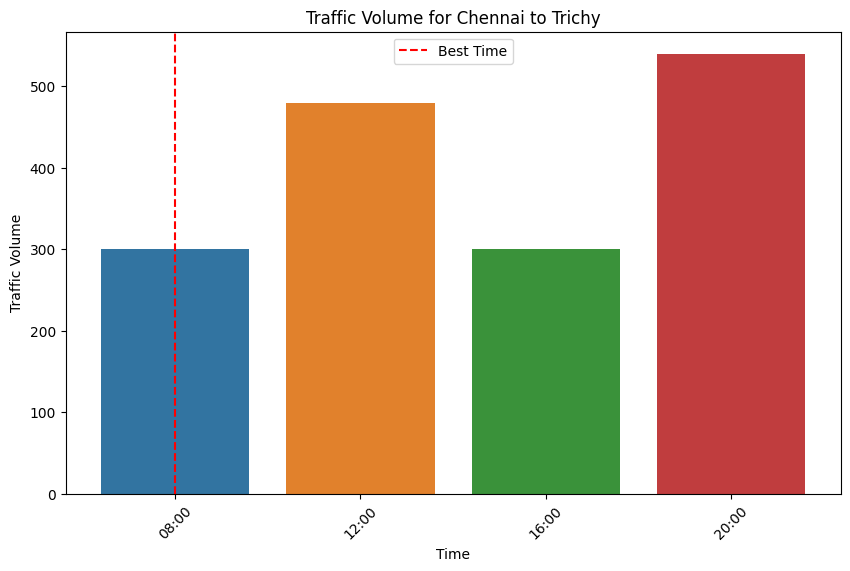

Based on traffic volume data, the best time to travel from Chennai to Trichy is at 08:00.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_traffic_volume_recommendation(data, arrival_place, departure_place):

    data_filtered = data[(data['Arrival_Place'] == arrival_place) & (data['Departure_Place'] == departure_place)]

    if data_filtered.empty:
        return "No data found for the given input."


    traffic_volume_data = data_filtered.groupby('Time')['Traffic_Volume'].mean().reset_index()


    plt.figure(figsize=(10, 6))
    sns.barplot(data=traffic_volume_data, x='Time', y='Traffic_Volume')
    plt.title(f'Traffic Volume for {arrival_place} to {departure_place}')
    plt.xlabel('Time')
    plt.ylabel('Traffic Volume')
    plt.xticks(rotation=45)


    best_time = traffic_volume_data['Time'][traffic_volume_data['Traffic_Volume'].idxmin()]

    plt.axvline(x=best_time, color='red', linestyle='--', label='Best Time')

    plt.legend()
    plt.show()

    return f"Based on traffic volume data, the best time to travel from {arrival_place} to {departure_place} is at {best_time}."


user_input_arrival = 'Chennai'
user_input_departure = 'Trichy'

recommendation = plot_traffic_volume_recommendation(data, user_input_arrival, user_input_departure)
print(recommendation)


Predicted Traffic: Low
Predicted traffic is Low with a speed of 60.0 km/h, a volume of 300.0, in Clear weather (Sunny). The event type is International Day of the Girl Child.
The best time to travel from Chennai to Trichy is at 12:00 with the lowest traffic speed.


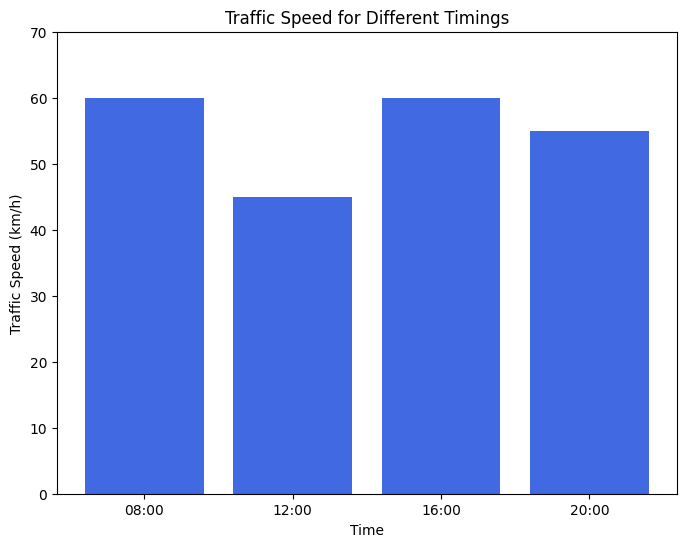

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


user_input_date = '07/10/2023'
user_input_time = '08:00'
user_input_arrival = 'Chennai'
user_input_departure = 'Trichy'

predicted_traffic, interpretation = predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure)
print(f"Predicted Traffic: {predicted_traffic}")
print(interpretation)


def create_traffic_speed_graph(data, user_input_arrival, user_input_departure):

    filter_query = (data['Arrival_Place'] == user_input_arrival) & (data['Departure_Place'] == user_input_departure)
    filtered_data = data[filter_query]

    if not filtered_data.empty:

        timings = ['08:00', '12:00', '16:00', '20:00']
        traffic_speeds = []

        for time in timings:
            time_query = filtered_data['Time'] == time
            speed_values = filtered_data[time_query]['Traffic_Speed'].values
            traffic_speeds.append(speed_values[0] if len(speed_values) > 0 else None)


        plt.figure(figsize=(8, 6))
        plt.bar(timings, traffic_speeds, color='royalblue')
        plt.xlabel('Time')
        plt.ylabel('Traffic Speed (km/h)')
        plt.title('Traffic Speed for Different Timings')
        plt.ylim(0, max(traffic_speeds) + 10)


        best_time_index = traffic_speeds.index(min(traffic_speeds))
        best_time = timings[best_time_index]

        return best_time, plt

    return None, None

best_time, graph = create_traffic_speed_graph(data, user_input_arrival, user_input_departure)

if best_time:
    print(f"The best time to travel from {user_input_arrival} to {user_input_departure} is at {best_time} with the lowest traffic speed.")
    plt.show()
else:
    print("No data found for the given arrival and departure places.")


if graph:
    plt.show()


Box Plot for Traffic Speed Distribution

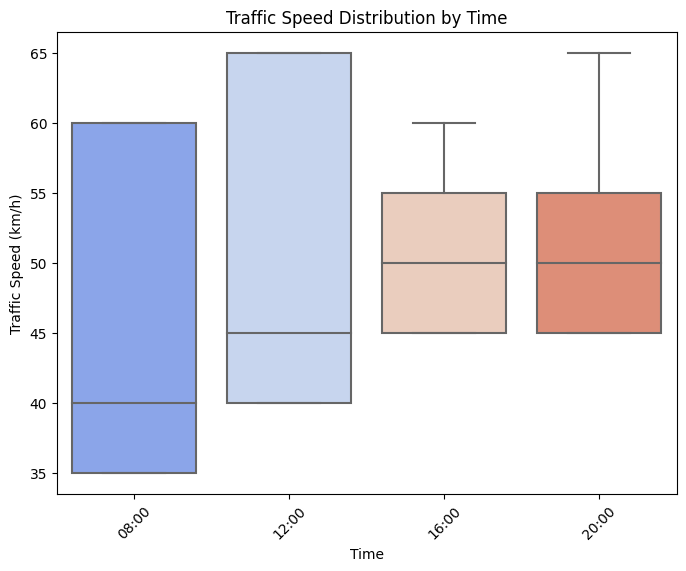

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

# Create a box plot for traffic speed
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Time', y='Traffic_Speed', palette='coolwarm')
plt.xlabel('Time')
plt.ylabel('Traffic Speed (km/h)')
plt.title('Traffic Speed Distribution by Time')
plt.xticks(rotation=45)
plt.show()



 Correlation Heatmap

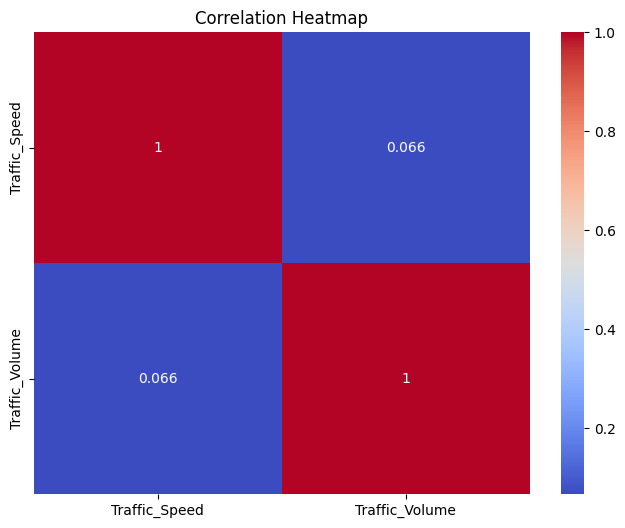

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

# Select only numerical columns for correlation calculation
numerical_columns = data.select_dtypes(include=['number'])
corr_matrix = numerical_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




Count Plot for Weather Conditions:

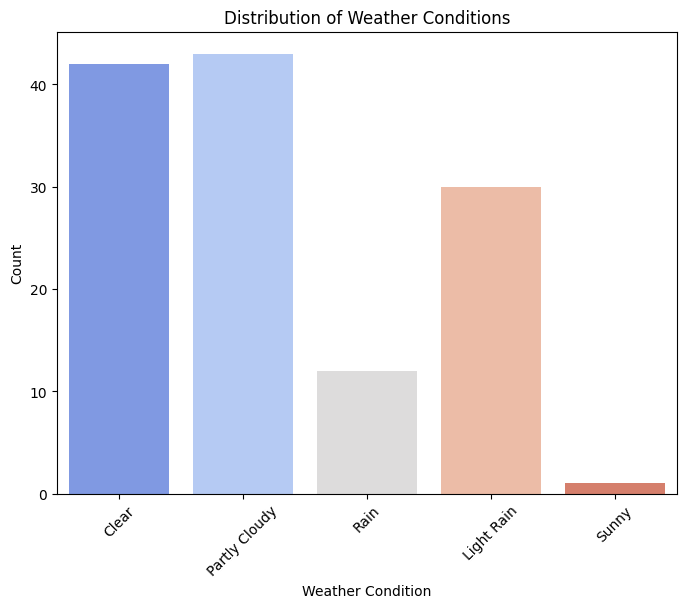

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

# Create a count plot for weather conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Weather_Condition', palette='coolwarm')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Distribution of Weather Conditions')
plt.xticks(rotation=45)
plt.show()


Line Plot for Traffic Volume Over Time:

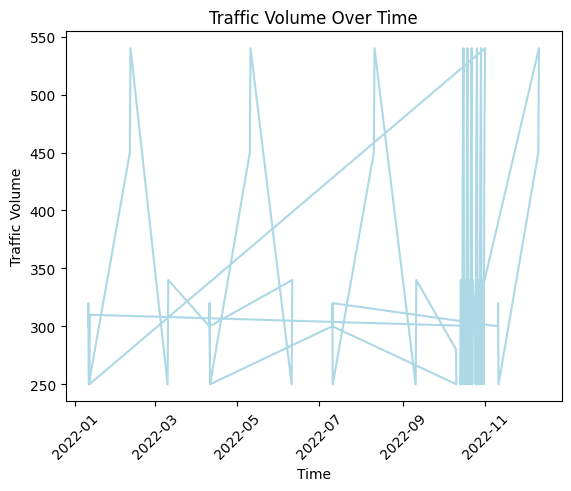

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')
# Assuming you have a 'Timestamp' column in your dataset
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Create a line plot for traffic volume over time
plt.plot(data['Timestamp'], data['Traffic_Volume'], color='lightblue')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.xticks(rotation=45)
plt.show()


Stacked Bar Chart for Traffic Volume by Event Type

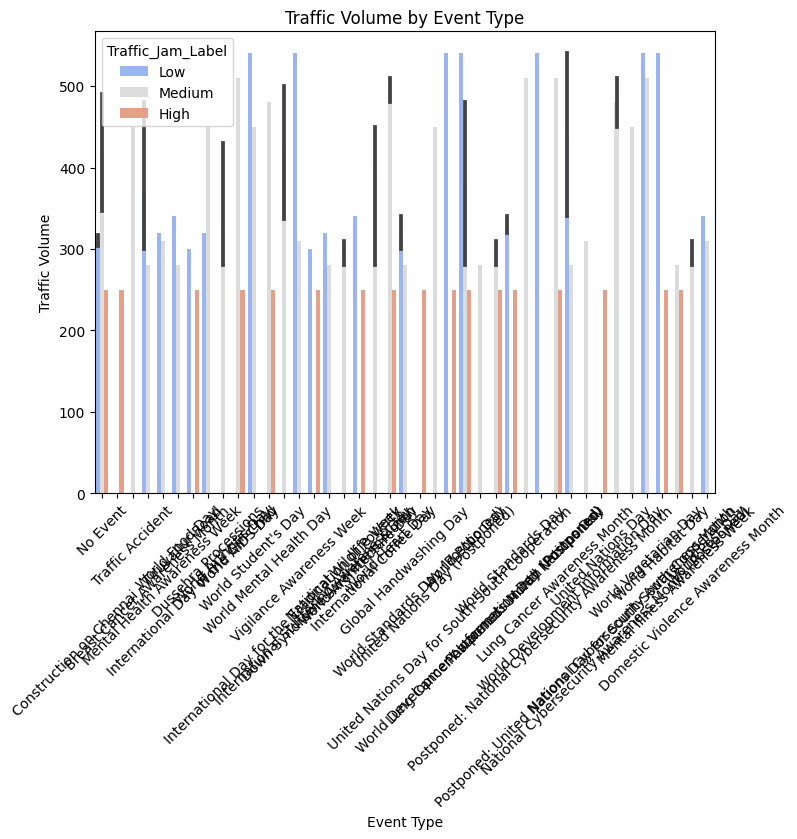

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')
# Create a stacked bar chart for traffic volume by event type
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Event_Type', y='Traffic_Volume', hue='Traffic_Jam_Label', palette='coolwarm')
plt.xlabel('Event Type')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume by Event Type')
plt.xticks(rotation=45)
plt.show()

Heatmap for Traffic Speed by Weather Condition:

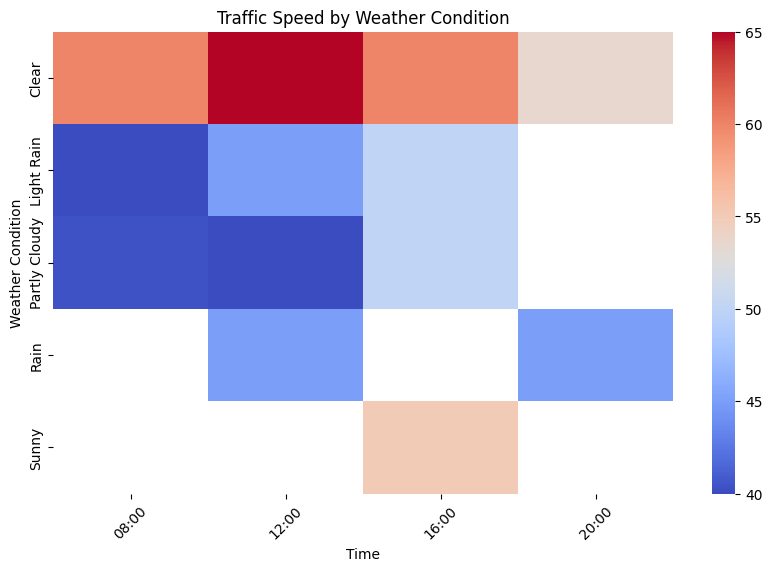

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')
# Create a heatmap for traffic speed by weather condition
heatmap_data = data.pivot_table(index='Weather_Condition', columns='Time', values='Traffic_Speed', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.xlabel('Time')
plt.ylabel('Weather Condition')
plt.title('Traffic Speed by Weather Condition')
plt.xticks(rotation=45)
plt.show()


Area Chart for Cumulative Traffic Volume

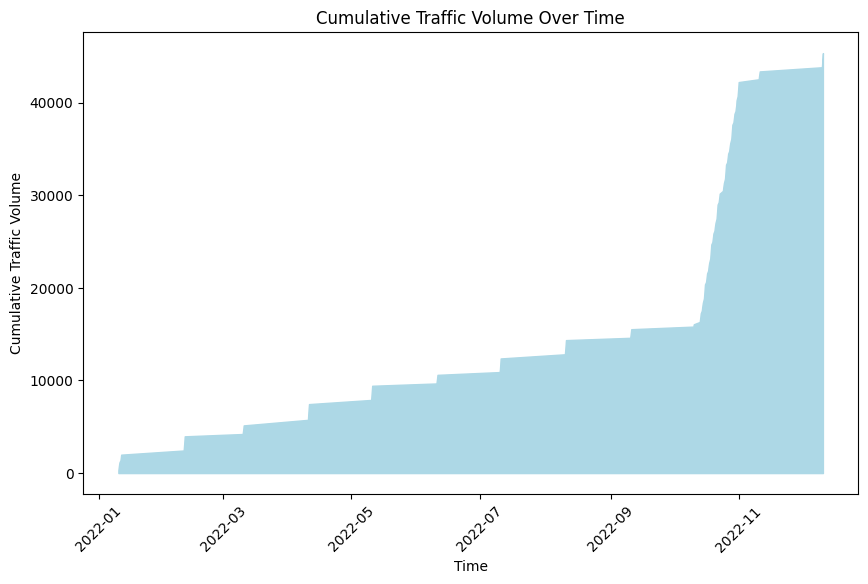

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

cumulative_volume = data.groupby('Timestamp')['Traffic_Volume'].sum().cumsum()
plt.figure(figsize=(10, 6))
plt.fill_between(cumulative_volume.index, cumulative_volume, color='lightblue')
plt.xlabel('Time')
plt.ylabel('Cumulative Traffic Volume')
plt.title('Cumulative Traffic Volume Over Time')
plt.xticks(rotation=45)
plt.show()

Line Plot for Traffic Speed and Volume Over Time (Dual Axis)

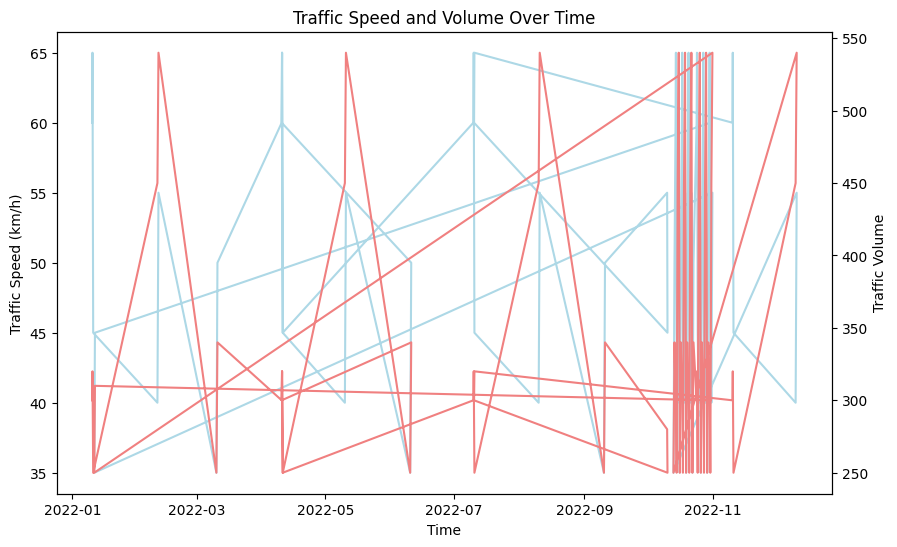

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
# Create a dual-axis line plot for traffic speed and volume over time
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(data['Timestamp'], data['Traffic_Speed'], label='Traffic Speed', color='lightblue')
ax2.plot(data['Timestamp'], data['Traffic_Volume'], label='Traffic Volume', color='lightcoral')
ax1.set_xlabel('Time')
ax1.set_ylabel('Traffic Speed (km/h)')
ax2.set_ylabel('Traffic Volume')
plt.title('Traffic Speed and Volume Over Time')
plt.xticks(rotation=45)
plt.show()

LSTM - ACCURACY

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

X = data[['Traffic_Speed', 'Traffic_Volume']]
y = data['Traffic_Jam_Label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1]:.9f}')


Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 121.1180 - accuracy: 0.1765
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 102.9164 - accuracy: 0.1765
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 86.1278 - accuracy: 0.1765
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 69.2057 - accuracy: 0.1765
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 52.6693 - accuracy: 0.1667
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 39.9589 - accuracy: 0.2255
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 32.8902 - accuracy: 0.3333
Epoch 8/10
4/4 [==============================] - 0s 9ms/step - loss: 23.3560 - accuracy: 0.3333
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 14.3146 - accuracy: 0.2451
Epoch 10/10
1/1 [==============================] - 1s 546ms/step - loss: 2.3189 - accuracy: 0.5769
Accuracy: 0.576923072


LSTM - ACCURACY IMPROVED

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

X = data[['Traffic_Speed', 'Traffic_Volume']].values
y = data['Traffic_Jam_Label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1]:.9f}')


Epoch 1/10
4/4 [==============================] - 5s 8ms/step - loss: 1.4262 - accuracy: 0.1765
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 1.3346 - accuracy: 0.1765
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 1.2730 - accuracy: 0.1765
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 1.2196 - accuracy: 0.3235
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 1.1857 - accuracy: 0.3333
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1517 - accuracy: 0.3529
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1179 - accuracy: 0.3431
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1040 - accuracy: 0.3039
Epoch 9/10
4/4 [==============================] - 0s 10ms/step - loss: 1.0900 - accuracy: 0.3235
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 1.0618 - accuracy: 0.7308
Accuracy: 0.730769217


ACCURACY - GRU

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.utils import to_categorical

data = pd.read_csv('/content/sample_data/dataset4th - Sheet1.csv')

X = data[['Traffic_Speed', 'Traffic_Volume']].values
y = data['Traffic_Jam_Label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy[1]:.1f}')


Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 155.9156 - accuracy: 0.4902
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 154.3797 - accuracy: 0.4902
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 152.9444 - accuracy: 0.4902
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 151.4084 - accuracy: 0.4902
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 149.9402 - accuracy: 0.4902
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 148.3705 - accuracy: 0.4902
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 146.9295 - accuracy: 0.4902
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 145.3821 - accuracy: 0.4902
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 143.8634 - accuracy: 0.4902
Epoch 10/10
1/1 [==============================] - 0s 133ms/step - loss: 143.3166 - accuracy: 0.4615
Accuracy: 0.5


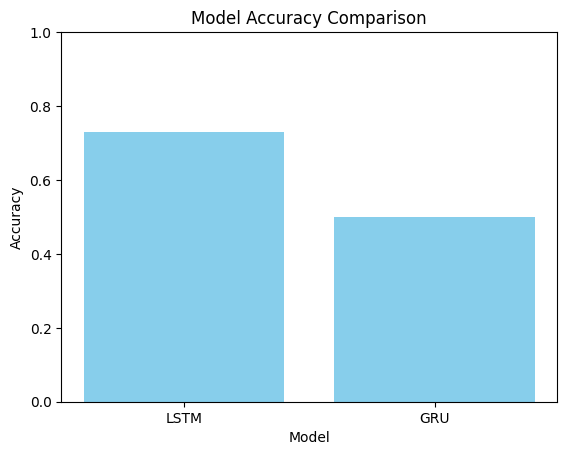

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracy scores
models = ['LSTM', 'GRU']
accuracy_scores = [0.730769217, 0.5]  # Replace with your actual accuracy scores

# Create a bar chart
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1)

# Display the chart
plt.show()


BEST ROUTE RECOMMENDATION

In [ ]:
from datetime import datetime, timedelta

def predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure, date_match_tolerance=365):

    user_input_date = datetime.strptime(user_input_date, '%d/%m/%Y')

    date_range = (user_input_date - timedelta(days=date_match_tolerance), user_input_date + timedelta(days=date_match_tolerance))

    date_query = (pd.to_datetime(data['Date'], format='%d/%m/%Y') >= date_range[0]) & (pd.to_datetime(data['Date'], format='%d/%m/%Y') <= date_range[1])
    time_query = (data['Time'] == user_input_time)
    arrival_query = (data['Arrival_Place'] == user_input_arrival)
    departure_query = (data['Departure_Place'] == user_input_departure)

    query = date_query & time_query & arrival_query & departure_query
    filtered_data = data[query]

    if not filtered_data.empty:

        predicted_traffic_label = filtered_data['Traffic_Jam_Label'].values[0]


        best_route = filtered_data['Via'].values[0]


        traffic_speed = filtered_data['Traffic_Speed'].values[0]
        traffic_volume = filtered_data['Traffic_Volume'].values[0]
        weather_condition = filtered_data['Weather_Condition'].values[0]
        weather_attribute = filtered_data['Weather_Attribute'].values[0]
        event_type = filtered_data['Event_Type'].values[0]

        interpretation = f"Predicted traffic is {predicted_traffic_label} with a speed of {traffic_speed} km/h, a volume of {traffic_volume}, in {weather_condition} weather ({weather_attribute}). The event type is {event_type}. The best route is {best_route}."

        return predicted_traffic_label, interpretation
    else:
        return "No data found for the given input."


user_input_date = '07/10/2023'
user_input_time = '08:00'
user_input_arrival = 'Chennai'
user_input_departure = 'Trichy'

predicted_traffic, interpretation = predict_traffic_jam(user_input_date, user_input_time, user_input_arrival, user_input_departure)
print(f"Predicted Traffic: {predicted_traffic}")
print(interpretation)


Predicted Traffic: Low
Predicted traffic is Low with a speed of 60.0 km/h, a volume of 300.0, in Clear weather (Sunny). The event type is International Day of the Girl Child. The best route is Chennai - Trichy - Dindugal Road.
